# Loyal Health Data Science Coding Challenge

Instructions: The following questions are designed to assess your understanding of common data science concepts with which you should be familiar. We’ll have you complete some basic analysis over text reviews and their metadata from the popular music review site Pitchfork (https://pitchfork.com/). The data can be downloaded here (https://www.kaggle.com/nolanbconaway/pitchfork-data) in the form of a SQLite database.  We expect this to take around 2 hours (at most 3 hours) to complete. Although the completion of the assignment will not be strictly timed, please do not go over the allotted time. If time is an issue, focus the most on problems 2, 4, and 5. 

Write all of your code in this Jupyter notebook. When you’ve completed the assessment, please create a GitHub repository, and email us a link to this repository.


In [1]:
# Import here

import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import statsmodels.formula.api as smf


con = sqlite3.connect('database.sqlite')
genre = pd.read_sql('SELECT * FROM genres', con)
artist = pd.read_sql('SELECT * FROM artists', con)
content = pd.read_sql('SELECT * FROM content', con)
labels = pd.read_sql('SELECT * FROM labels', con)
reviews = pd.read_sql('SELECT * FROM reviews', con)
years = pd.read_sql_query("SELECT * FROM years", con)

## 1. Cursory Data Analysis:
a) Compute the number of albums belonging to each genre. You should notice that some albums have multiple genres listed (e.g. Folk/Country,Pop/R&B,Rock) separated by commas. Consider albums with multiple genres as belonging to each of those genres (i.e. an album with Rap,Rock as it’s genres will be counted as one Rap album and one Rock album). 

b) Compute the number of albums released each year.

c) Compute the ten artists with the highest number of albums reviewed in the data set.

d) Compute the mean, median, standard deviation, minimum, and maximum album scores. 

e) Compute the average score by each review author and return the result in a dataframe sort in descending order.

f) Compute the average album score per artist and return the result in a dataframe with an additional column for the number of albums they’ve had reviewed.
    i) Return the artists with the top 10 highest average scores
    ii) Return the artists with the top 10 lowest average scores


##### a) Compute the number of albums belonging to each genre. You should notice that some albums have multiple genres listed (e.g. Folk/Country,Pop/R&B,Rock) separated by commas. Consider albums with multiple genres as belonging to each of those genres (i.e. an album with Rap,Rock as it’s genres will be counted as one Rap album and one Rock album).

In [2]:
"""showing genres after splitting folk/country and pop/r&B"""

genre.genre.str.get_dummies(sep='/').sum()

country          685
electronic      3874
experimental    1815
folk             685
global           217
jazz             435
metal            860
pop             1432
r&b             1432
rap             1559
rock            9436
dtype: int64

##### b) Compute the number of albums released each year.

In [3]:
years.groupby(by = 'year', as_index = False, dropna = False).count().rename(columns={'reviewid':'Total Count'})

,year,Total Count
0,1959.0,1
1,1960.0,3
2,1962.0,3
3,1963.0,3
4,1964.0,5
5,1965.0,7
6,1966.0,8
7,1967.0,7
8,1968.0,16
9,1969.0,14


##### c) Compute the ten artists with the highest number of albums reviewed in the data set.

In [4]:
artist.groupby(by=['artist'], dropna = False).reviewid.count().sort_values(ascending=False).head(10)

artist
various artists        688
guided by voices        23
neil young              23
bonnie prince billy     22
the beatles             21
david bowie             21
gucci mane              20
of montreal             20
mogwai                  20
robert pollard          19
Name: reviewid, dtype: int64

##### d) Compute the mean, median, standard deviation, minimum, and maximum album scores. 

In [5]:
reviews['score'].agg(['mean', 'median', 'std', 'min', 'max'])

mean       7.005779
median     7.200000
std        1.293675
min        0.000000
max       10.000000
Name: score, dtype: float64

##### e) Compute the average score by each review author and return the result in a dataframe sort in descending order.

In [6]:
reviews.groupby(['author'], as_index = False).score.agg(['mean']).sort_values(by = 'mean', ascending = False)

,mean
author,
nelson george,10.000000
maura johnston,10.000000
carvell wallace,9.833333
dorian lynskey,9.500000
rollie pemberton & nick sylvester,9.400000
...,...
stephen m. deusner,3.800000
bob o. mcmillan,3.500000
dr. andy beta,3.300000


##### f) Compute the average album score per artist and return the result in a dataframe with an additional column for the number of albums they’ve had reviewed. i) Return the artists with the top 10 highest average scores ii) Return the artists with the top 10 lowest average scores

In [7]:
"""i) Return the artists with the top 10 highest average scores"""

top10_high = reviews[['artist','score']].groupby('artist', as_index = False).mean().sort_values(by = 'score', ascending = False).head(10)
top10_high

,artist,score
7063,television,10.00
6616,slint,10.00
7723,the stone roses,10.00
6845,stevie wonder,10.00
1682,dangelo,10.00
7004,talk talk,10.00
2292,elvis costello & the attractions,9.75
5135,n.w.a.,9.70
8147,ultramagnetic mc's,9.70
5113,my bloody valentine,9.55


In [8]:
"""ii) Return the artists with the top 10 lowest average scores"""

top10_low = reviews[['artist','score']].groupby('artist', as_index = False).mean().sort_values(by = 'score').head(10)
top10_low

,artist,score
8032,travis morrison,0.0
5891,push kings,0.1
1674,dan le sac vs. scroobius pip,0.2
6463,shat,0.2
4249,liars academy,0.6
7952,toe,0.8
4389,"lou reed, metallica",1.0
5310,non,1.0
2803,geoff farina,1.0
544,"avey tare, kra brekkan",1.0


## 2) SQL:

Merge the database tables into a dataframe containing all of the relevant metadata.


In [9]:
"""not taking artists since it is common between artists and reviews"""

query = """SELECT reviews.*, genres.genre, labels.label, content.content, years.year from reviews 
            INNER JOIN genres ON genres.reviewid = reviews.reviewid
            INNER JOIN labels ON labels.reviewid = reviews.reviewid
            INNER JOIN content ON content.reviewid = reviews.reviewid
            INNER JOIN years ON years.reviewid = reviews.reviewid"""

df = pd.read_sql_query(query, con)


## 3) Dataframe Manipulation (Using the Dataframe from part 2) create new DataFrames based on the stipulations below):

a) Create a new DataFrame excluding all artists with names that start with the letter “M” (either upper or lowercase).

b) Create a new DataFrame excluding albums with a score less than 4.0.

c) Create a new DataFrame excluding albums from the label Columbia

d) Create a new DataFrame excluding albums that belong to the metal genre.

e) Create a new DataFrame excluding albums where that artist’s name contains an even number of characters (including whitespace as characters)

f) Combine these DataFrames into one where each album meets the conditions required for each.


##### a) Create a new DataFrame excluding all artists with names that start with the  letter “M” (either upper or lowercase).

In [10]:
df_noM = df[~df.artist.str.startswith('m', 'M')]

##### b) Create a new DataFrame excluding albums with a score less than 4.0.

In [11]:
df_less4 = df[df.score >= 4.0]

##### c) Create a new DataFrame excluding albums from the label Columbia

In [12]:
df_noColumbia = df[~df.label.isin(['columbia','Columbia','columbia legacy'])]

##### d) Create a new DataFrame excluding albums that belong to the metal genre.

In [13]:
df_noMetal = df[df.genre != 'metal']

##### e) Create a new DataFrame excluding albums where that artist’s name contains an even number of characters (including whitespace as characters)

In [14]:
df_artistLen = df[df['artist'].apply(lambda artist: len(artist) % 2 != 0)]

##### f) Combine these DataFrames into one where each album meets the conditions required for each.

In [15]:
df_final = df[(~df.artist.str.startswith('m', 'M')) & (df.score >= 4.0) & (~df.label.isin(['columbia','Columbia','columbia legacy'])) & (df.genre != 'metal') & (df['artist'].apply(lambda artist: len(artist) % 2 != 0))].reset_index(drop = True)

## 4) Feature Engineering:

a) Construct a Pandas DataFrame (see problem 2) containing all album reviews and metadata. Remove any rows that have null values in any column.

b) Add a column to the dataframe for each genre. The entry in this column should be a 1 if the album/row in question belongs to that genre and 0 otherwise. Remember that albums can belong to multiple genres.

c) Add an additional two columns with categorical variables for 1) the author of the review and 2) the role of the author.

d) Create a column for the number of words in the review.

e) Create a column containing the sentiment score of the review. Treat the review as a single string and take the TextBlob polarity score (https://textblob.readthedocs.io/en/dev/quickstart.html).

##### a) Construct a Pandas DataFrame (see problem 2) containing all album reviews and metadata.  Remove any rows that have null values in any column.

In [16]:
df1 = df.dropna(axis = 0).reset_index(drop = True)

##### b) Add a column to the dataframe for each genre. The entry in this column should be a 1 if the album/row in question belongs to that genre and 0 otherwise. Remember that albums can belong to multiple genres.

In [17]:
df1 = pd.concat([df1, df1['genre'].str.get_dummies(sep = '/')], axis = 1)

# now drop the original 'genre' column (you don't need it anymore)
df1.drop(['genre'], axis = 1, inplace = True)

##### c) Add an additional two columns with categorical variables for 1) the author of the review and  2) the role of the author.

In [18]:
"""Since, the question has ambiguous interpretation as both the features are categorical and already have two columns,
I am building upon the previous question and creating dummy variables/one hot encoders"""

df1 = pd.get_dummies(df1, columns =['author','author_type'])

##### d) Create a column for the number of words in the review.

In [19]:
df1['total_words_review'] = df1.content.apply(lambda text: len(text.split()))

##### e) Create a column containing the sentiment score of the review. Treat the review as a single string and take the TextBlob polarity score (https://textblob.readthedocs.io/en/dev/quickstart.html).

In [20]:
df1['sentiment_pol'] = df1.content.apply(lambda score: TextBlob(score).sentiment.polarity)
df1.head()

,reviewid,title,artist,url,score,best_new_music,pub_date,pub_weekday,pub_day,pub_month,...,author_type_deputy news editor,author_type_editor-in-chief,author_type_executive editor,author_type_managing editor,author_type_news director,author_type_senior editor,author_type_senior staff writer,author_type_tracks coordinator,total_words_review,sentiment_pol
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,2017-01-08,6,8,1,...,0,0,0,0,0,0,0,0,1456,0.097281
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,2017-01-07,5,7,1,...,0,0,0,0,0,0,0,0,419,0.041640
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,2017-01-07,5,7,1,...,0,0,0,0,0,0,0,0,597,0.123304
3,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,2017-01-07,5,7,1,...,0,0,0,0,0,0,0,0,597,0.123304
4,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,2017-01-06,4,6,1,...,0,0,0,0,0,0,0,0,1240,0.161576


## 5) Logistic Regression: 

You will now use the features you constructed in the previous exercise to complete a binary logistic regression task accounting for whether an album reviews Pitchfork’s designation of “Best New Music.” This is represented by the binary “bnm” variable in the dataset. 

a) Scale all non-categorical variables as needed.

b) Perform your logistic regression model using the statsmodel library (https://www.pythonfordatascience.org/logistic-regression-python/ ). Treat the best new music variable as your dependent variable and use the release year, word count, sentiment, all genre binary variables, author, and author role as your independent variables. 

c) Calculate the odds ratios for your independent variables

d) What features are most/least predictive of a best new music designation and why do you think that is?

e) If you were to engineer an additional feature for the regression, what would it be? Describe how you would approach constructing that feature.


##### a) Scale all non-categorical variables as needed.

In [21]:
df_model = df1.copy()
df_model['score_scaled'] = (df_model.score - df_model.score.mean())/df_model.score.std()

df_model['review_words_scaled'] = (df_model.total_words_review - df_model.total_words_review.mean())/df_model.total_words_review.std()

df_model = df_model.drop(columns=['reviewid','artist','content','label','title','url','score', 'pub_date','pub_weekday','pub_day','pub_month','pub_year', 'score_scaled', 'total_words_review'])

##### b) Perform your logistic regression model using the statsmodel library (https://www.pythonfordatascience.org/logistic-regression-python/ ). Treat the best new music variable as your dependent variable and use the release year, word count, sentiment, all genre binary variables, author, and author role as your independent variables. 

In [22]:
"""Feature engineering and finding correlation between features"""

corr_genre = df_model[['electronic','metal','rock','rap','experimental','pop',
             'r&b','folk','country','jazz','global']].corr()

print("Genre Correlation Matrix \n\n", corr_genre)
df_model = df_model.drop(columns = ['r&b', 'country'])

Genre Correlation Matrix 

               electronic     metal      rock       rap  experimental  \
electronic      1.000000 -0.094636 -0.445967 -0.146329     -0.152262   
metal          -0.094636  1.000000 -0.180366 -0.059181     -0.061581   
rock           -0.445967 -0.180366  1.000000 -0.278888     -0.290197   
rap            -0.146329 -0.059181 -0.278888  1.000000     -0.095218   
experimental   -0.152262 -0.061581 -0.290197 -0.095218      1.000000   
pop            -0.136137 -0.055059 -0.259463 -0.085134     -0.088586   
r&b            -0.136137 -0.055059 -0.259463 -0.085134     -0.088586   
folk           -0.090926 -0.036774 -0.173295 -0.056861     -0.059167   
country        -0.090926 -0.036774 -0.173295 -0.056861     -0.059167   
jazz           -0.068205 -0.027585 -0.129991 -0.042652     -0.044382   
global         -0.055666 -0.022513 -0.106094 -0.034811     -0.036223   

                   pop       r&b      folk   country      jazz    global  
electronic   -0.136137 -0.136137

In [23]:
"""Creating models for each feature first to check analysis on each feature"""

df_model = df_model.rename(columns={'global':'genre_global'})
model_genre = smf.logit("best_new_music ~ year + electronic + folk + experimental + genre_global + pop + jazz + metal + rap + rock + review_words_scaled + sentiment_pol", data = df_model).fit()

Optimization terminated successfully.
         Current function value: 0.225845
         Iterations 9


In [24]:
model_genre.summary()

/Users/Yatharth/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         best_new_music   No. Observations:                17904
Model:                          Logit   Df Residuals:                    17892
Method:                           MLE   Df Model:                           11
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.1730
Time:                        16:26:25   Log-Likelihood:                -4043.5
converged:                       True   LL-Null:                       -4889.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -35.9148        nan        nan        nan         nan         nan
year                    0.0182      0.004      4.549      0.000       0.010       0.026
electronic             -3.6484        nan        nan        nan         nan         nan
folk                   -4.2515        nan        nan        nan         nan         nan
experimental           -3.4443        nan        nan        nan         nan         nan
genre_global           -4.5082        nan        nan        nan         nan         nan
pop                    -3.6451        nan        nan        nan         nan         nan
jazz                   -4.0590        nan        nan        nan         nan         nan
metal                  -4.4109        nan        nan        nan         nan         nan
rap                    -4.2113        nan        nan        nan         nan         nan
rock                   -3.7361        nan        nan        nan         nan         nan
review_words_scaled     0.9559      0.026     36.452      0.000       0.904       1.007
sentiment_pol           2.4379      0.591      4.126      0.000       1.280       3.596
=======================================================================================
"""

In [25]:
df_model.columns = df_model.columns.str.replace(' ','_')
model_authtype = smf.logit("best_new_music ~ year + author_type_assistant_editor + author_type_associate_editor + author_type_associate_features_editor + author_type_associate_staff_writer + author_type_contributing_editor + author_type_contributor + author_type_deputy_news_editor + sentiment_pol + review_words_scaled", data = df_model).fit()

         Current function value: 0.222939
         Iterations: 35


/Users/Yatharth/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
model_authtype.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         best_new_music   No. Observations:                17904
Model:                          Logit   Df Residuals:                    17893
Method:                           MLE   Df Model:                           10
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.1837
Time:                        16:26:26   Log-Likelihood:                -3991.5
converged:                      False   LL-Null:                       -4889.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               -34.7538      8.036     -4.325      0.000     -50.503     -19.004
year                                      0.0161      0.004      4.036      0.000       0.008       0.024
author_type_assistant_editor             -0.8466      0.841     -1.007      0.314      -2.494       0.801
author_type_associate_editor            -15.5475    837.199     -0.019      0.985   -1656.427    1625.332
author_type_associate_features_editor    -0.0178      0.770     -0.023      0.982      -1.526       1.491
author_type_associate_staff_writer       -1.7113      0.498     -3.437      0.001      -2.687      -0.736
author_type_contributing_editor          -0.8197      0.243     -3.371      0.001      -1.296      -0.343
author_type_contributor                  -0.9666      0.075    -12.879      0.000      -1.114      -0.819
author_type_deputy_news_editor           -1.2854      0.530     -2.424      0.015      -2.325      -0.246
sentiment_pol                             2.5429      0.588      4.325      0.000       1.391       3.695
review_words_scaled                       0.9336      0.026     35.908      0.000       0.883       0.985
=========================================================================================================
"""

In [27]:
model_author = smf.logit("best_new_music ~ year + author_aaron_leitko + author_amanda_petrusich + author_brandon_soderberg + author_chris_dahlen + author_craig_jenkins + author_eric_grandy + author_hari_ashurst + author_jeremy_gordon + sentiment_pol + review_words_scaled", data = df_model).fit()

         Current function value: 0.227156
         Iterations: 35


/Users/Yatharth/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [28]:
model_author.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         best_new_music   No. Observations:                17904
Model:                          Logit   Df Residuals:                    17892
Method:                           MLE   Df Model:                           11
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.1682
Time:                        16:26:26   Log-Likelihood:                -4067.0
converged:                      False   LL-Null:                       -4889.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -34.6805      7.920     -4.379      0.000     -50.204     -19.157
year                         0.0157      0.004      3.980      0.000       0.008       0.023
author_aaron_leitko         -0.2915      0.590     -0.494      0.621      -1.447       0.864
author_amanda_petrusich      0.2970      0.279      1.063      0.288      -0.251       0.845
author_brandon_soderberg     1.9155      0.585      3.274      0.001       0.769       3.062
author_chris_dahlen        -19.6858   4.02e+04     -0.000      1.000   -7.89e+04    7.88e+04
author_craig_jenkins         0.2963      0.379      0.782      0.434      -0.446       1.039
author_eric_grandy          -0.7537      1.014     -0.743      0.457      -2.742       1.234
author_hari_ashurst         -0.3968      1.011     -0.392      0.695      -2.379       1.585
author_jeremy_gordon         0.2455      0.622      0.395      0.693      -0.973       1.464
sentiment_pol                2.6854      0.586      4.580      0.000       1.536       3.835
review_words_scaled          0.9405      0.026     36.244      0.000       0.890       0.991
============================================================================================
"""

In [29]:
"""Since the cardinality is high for authors and author type I am selecting few samples"""

model = smf.logit("best_new_music ~ year + electronic + folk + pop + jazz + metal + rap + rock + author_aaron_leitko + author_amanda_petrusich + author_brandon_soderberg + author_chris_dahlen + author_craig_jenkins + author_type_associate_features_editor + author_type_associate_staff_writer + author_type_contributing_editor + author_type_contributor + author_type_deputy_news_editor + sentiment_pol + review_words_scaled", data = df_model).fit()

         Current function value: 0.221812
         Iterations: 35


/Users/Yatharth/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         best_new_music   No. Observations:                17904
Model:                          Logit   Df Residuals:                    17883
Method:                           MLE   Df Model:                           20
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.1878
Time:                        16:26:26   Log-Likelihood:                -3971.3
converged:                      False   LL-Null:                       -4889.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               -38.7177      8.202     -4.720      0.000     -54.794     -22.641
year                                      0.0182      0.004      4.460      0.000       0.010       0.026
electronic                               -0.1278      0.116     -1.100      0.271      -0.356       0.100
folk                                     -0.6392      0.228     -2.808      0.005      -1.085      -0.193
pop                                      -0.1317      0.140     -0.943      0.346      -0.406       0.142
jazz                                     -0.5400      0.256     -2.107      0.035      -1.042      -0.038
metal                                    -0.7244      0.219     -3.303      0.001      -1.154      -0.295
rap                                      -0.7401      0.150     -4.933      0.000      -1.034      -0.446
rock                                     -0.1914      0.101     -1.895      0.058      -0.389       0.007
author_aaron_leitko                      -0.2140      0.591     -0.362      0.717      -1.373       0.945
author_amanda_petrusich                   0.4663      0.281      1.657      0.097      -0.085       1.018
author_brandon_soderberg                  2.1520      0.594      3.623      0.000       0.988       3.316
author_chris_dahlen                     -19.5549   3.96e+04     -0.000      1.000   -7.76e+04    7.75e+04
author_craig_jenkins                      0.8592      0.390      2.203      0.028       0.095       1.624
author_type_associate_features_editor    -0.0033      0.772     -0.004      0.997      -1.516       1.510
author_type_associate_staff_writer       -1.3818      0.501     -2.761      0.006      -2.363      -0.401
author_type_contributing_editor          -0.9030      0.248     -3.647      0.000      -1.388      -0.418
author_type_contributor                  -0.9339      0.075    -12.372      0.000      -1.082      -0.786
author_type_deputy_news_editor           -1.2612      0.523     -2.411      0.016      -2.286      -0.236
sentiment_pol                             2.3574      0.595      3.965      0.000       1.192       3.523
review_words_scaled                       0.9508      0.027     35.862      0.000       0.899       1.003
=========================================================================================================
"""

##### c) Calculate the odds ratios for your independent variables

In [31]:
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
Intercept,1.531542e-17,2.355556e-06,1.596540e-24,1.469191e-10
year,1.018381e+00,8.180239e-06,1.010263e+00,1.026565e+00
electronic,8.799878e-01,2.711990e-01,7.007666e-01,1.105045e+00
folk,5.277376e-01,4.978887e-03,3.378276e-01,8.244056e-01
pop,8.765614e-01,3.458966e-01,6.665089e-01,1.152813e+00
jazz,5.827425e-01,3.509251e-02,3.526545e-01,9.629505e-01
metal,4.846038e-01,9.573607e-04,3.152722e-01,7.448829e-01
rap,4.770769e-01,8.094206e-07,3.555398e-01,6.401599e-01
rock,8.258293e-01,5.812789e-02,6.775156e-01,1.006610e+00
author_aaron_leitko,8.073354e-01,7.174268e-01,2.533264e-01,2.572927e+00


##### d) What features are most/least predictive of a best new music designation and why do you think that is?

1) As you can see from different models, genre is the least predictive feature. I believe this is because it's difficult to predict music reviews/taste based on genres as people might be biased towards specific genres. Also, rock and elctronic genres cover almost 50% of the data. Having more data of genre related to reviews would lead to better generalization.

2) Sentiment and No. words in a review have the most predictive value (1.056333e+01 and 2.587656e+00 OR val respectively) which might show that people write longer reviews for the albums/music they like.

##### e) If you were to engineer an additional feature for the regression, what would it be? Describe how you would approach constructing that feature.

1) One of the features I would include is number of weeks the album was in top 5 or top 10 (like Billboard) which would give more information about the album or taste of the reviewer. 

2) Also, streaming data on different apps like Apple Music or Spotify would be a nice addition. I understand that the data starts from 1950s and we didn't have streaming apps back then, we could use radio streaming data which might available through different APIs like SiriusXM or NPR.

3) I would clean the dataset further as some values have been used multiple ways (like author - 'author_david_bevan', author_david_bevan_'). Better cleaning of the data would help in better generalization.

## 6) Data Visualization (Optional): 

Using the results from your regression and data analysis create a visualization that tells a story about the data. Feel free to take personal liberties with this and be as creative as you like. 

In [32]:
sns.set(rc = {'figure.figsize':(15,15),
              'axes.labelweight': 'bold',
              'figure.dpi': 300
             }
       )

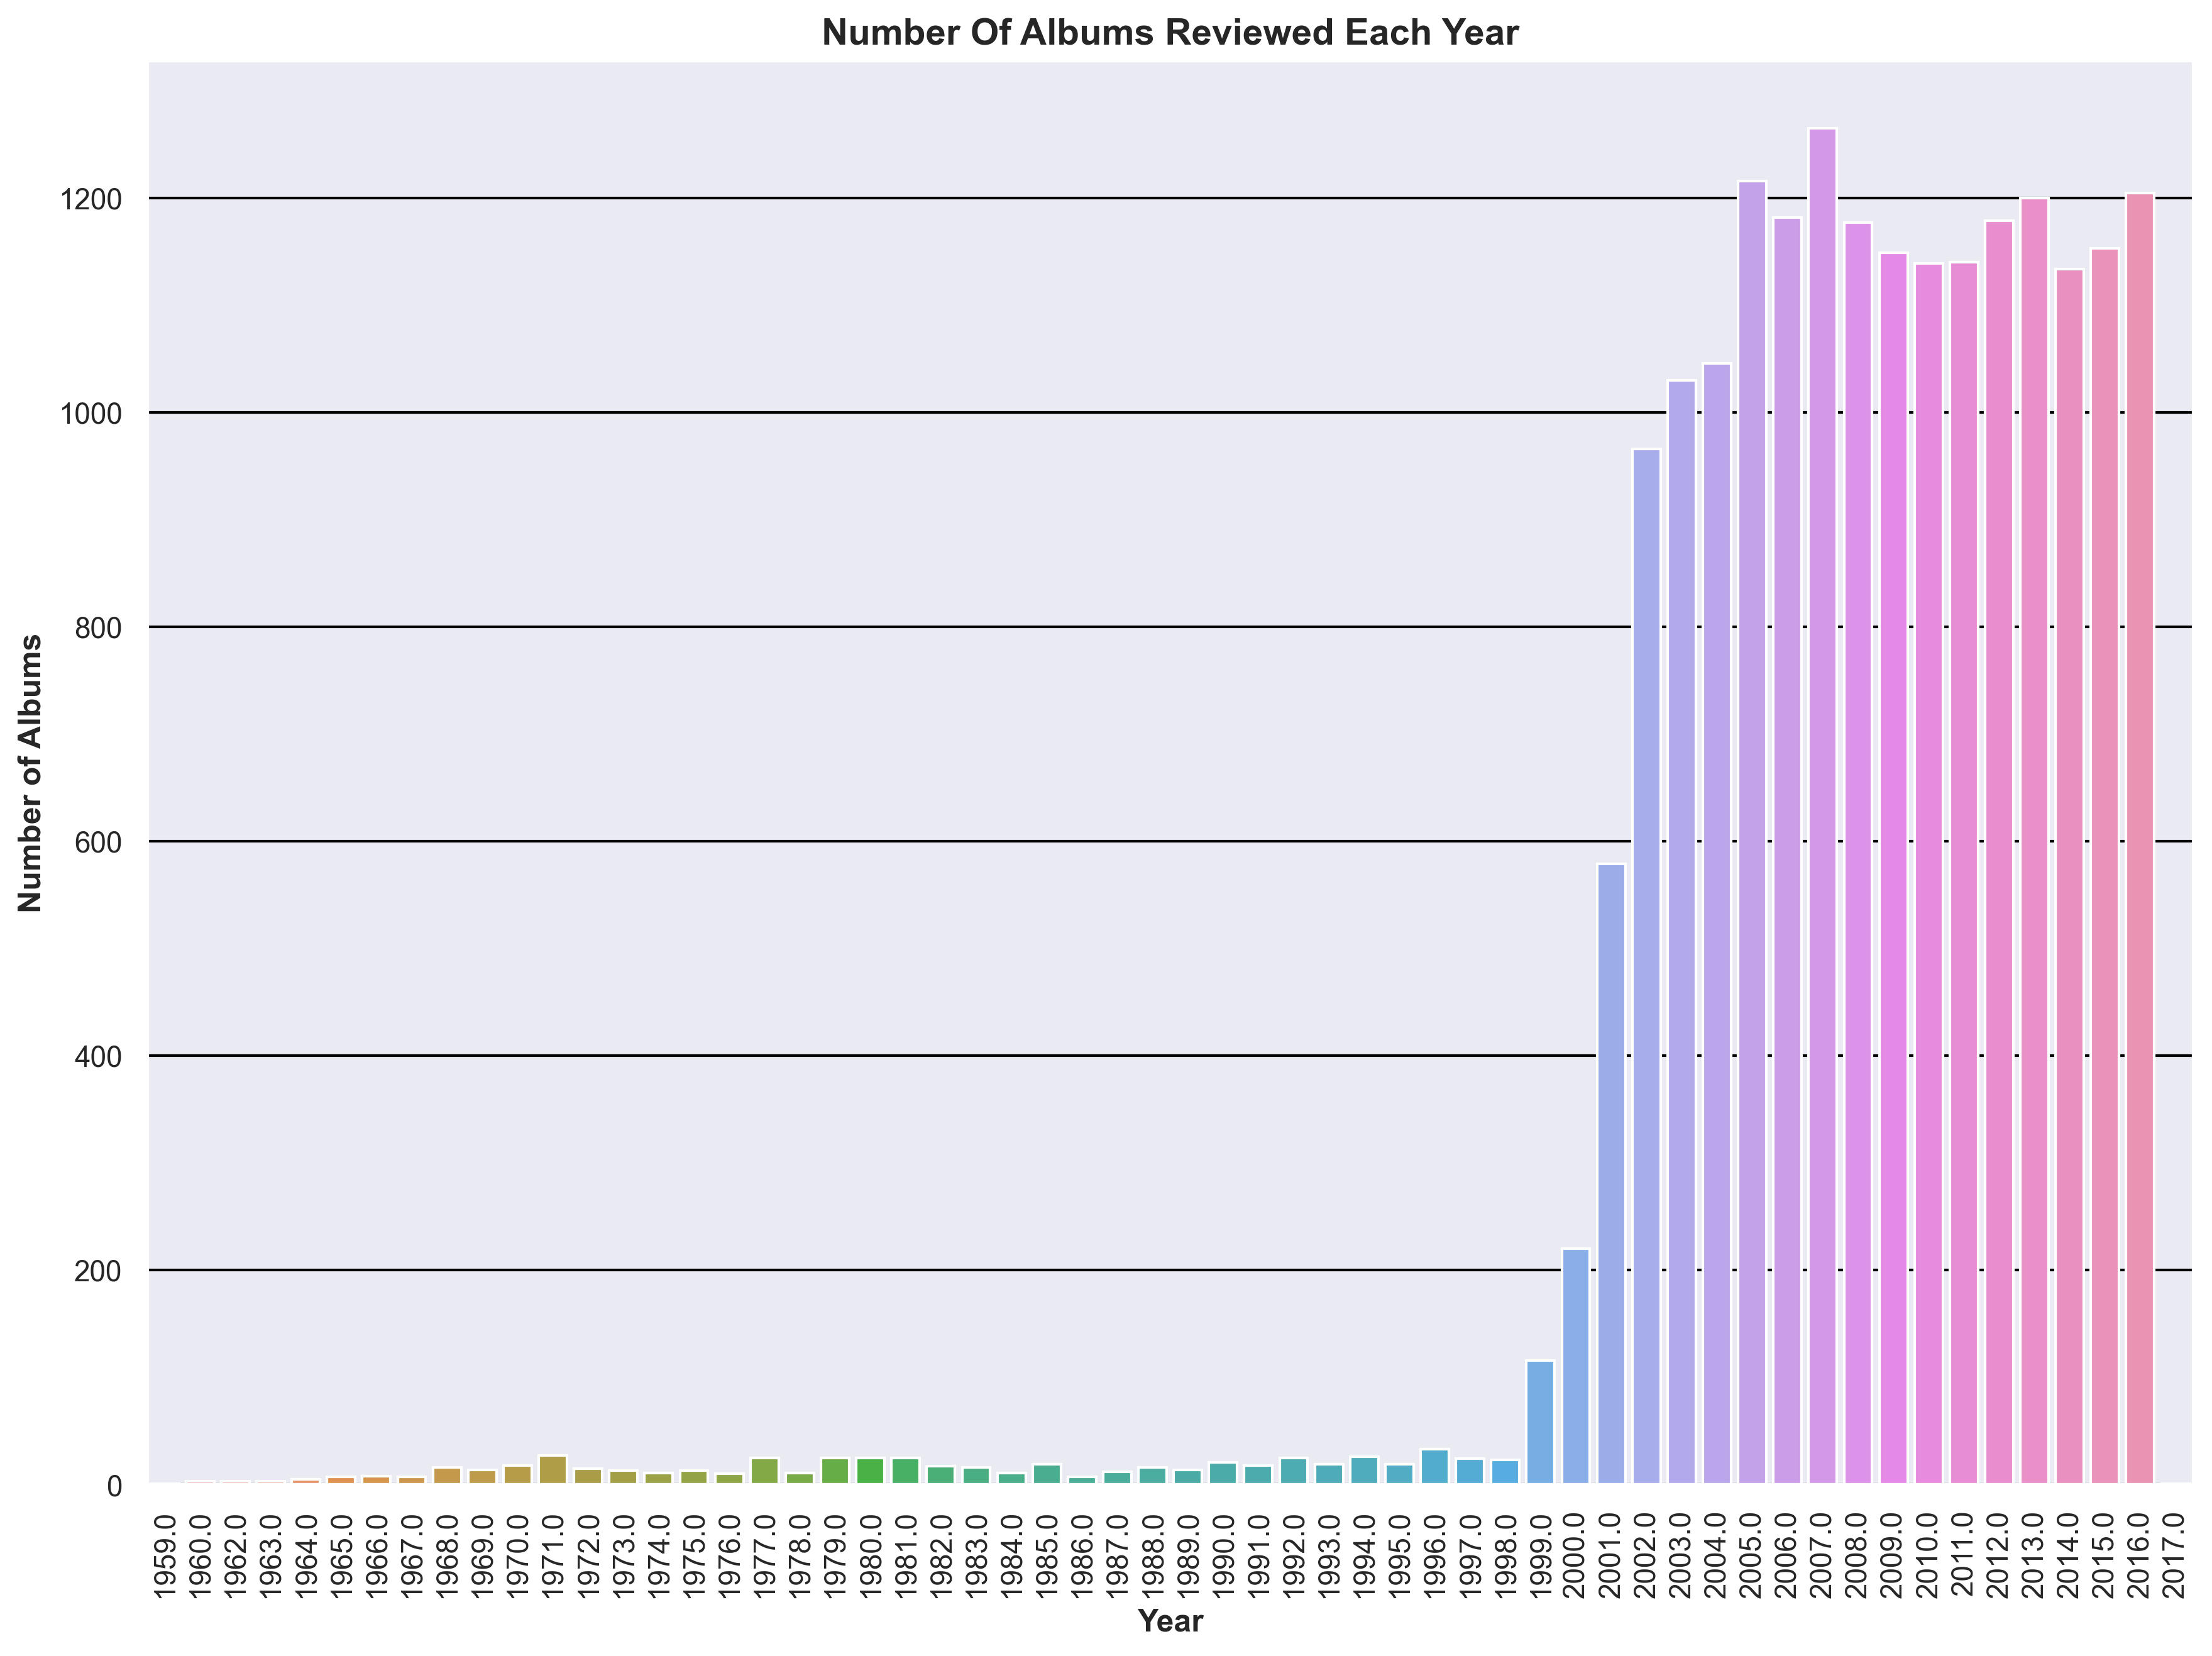

In [33]:
# Number of reviews in each year.
years_df = years.groupby(by='year').count().sort_values(by='year',ascending=True).rename({'reviewid':'NumOfAlbums'}, axis = 1)
years_df['Years'] = years_df.index
years_df.index = list(range(years_df.shape[0]))
years_df = years_df[['Years','NumOfAlbums']]
years_df.columns = ['Years', 'Number of Albums reviewed']

fig, axs = plt.subplots(nrows=1,ncols=1, figsize=(14,10), dpi=300)

axs = sns.barplot(data=years_df, x = 'Years', y = 'Number of Albums reviewed')

axs.set_title('Number Of Albums Reviewed Each Year', fontsize=14, weight='bold')
axs.set_xlabel('Year')
axs.set_ylabel('Number of Albums')
plt.xticks(rotation=90)
plt.grid(b=True, axis='y', color='black')

plt.show()

The above chart shows there has been exponential increase in the number of reviews since 2000. This is plausible because of the internet boom in the late 90s which would promote this.

In [34]:
# Reviews for each genre in each decade

decades = list(range(1950,2030,10))
decade_df = df.groupby(['genre', pd.cut(df.year, decades)])
decade_df = decade_df.size().unstack()
decade_df.columns = ['50s','60s', '70s', '80s', '90s', '2000s', '2010s']
decade_df = decade_df[['50s','60s', '70s', '80s', '90s', '2000s', '2010s']]
decade_df.reset_index(inplace=True)

In [35]:
decade_df

,genre,50s,60s,70s,80s,90s,2000s,2010s
0,electronic,0,6,21,25,129,2485,1546
1,experimental,0,9,30,26,65,1210,670
2,folk/country,0,6,9,3,10,482,241
3,global,1,2,11,1,7,181,76
4,jazz,2,9,9,3,12,319,117
5,metal,0,1,5,8,33,574,339
6,pop/r&b,0,8,20,14,23,852,713
7,rap,0,0,0,11,23,864,965
8,rock,0,59,118,101,395,6709,3210


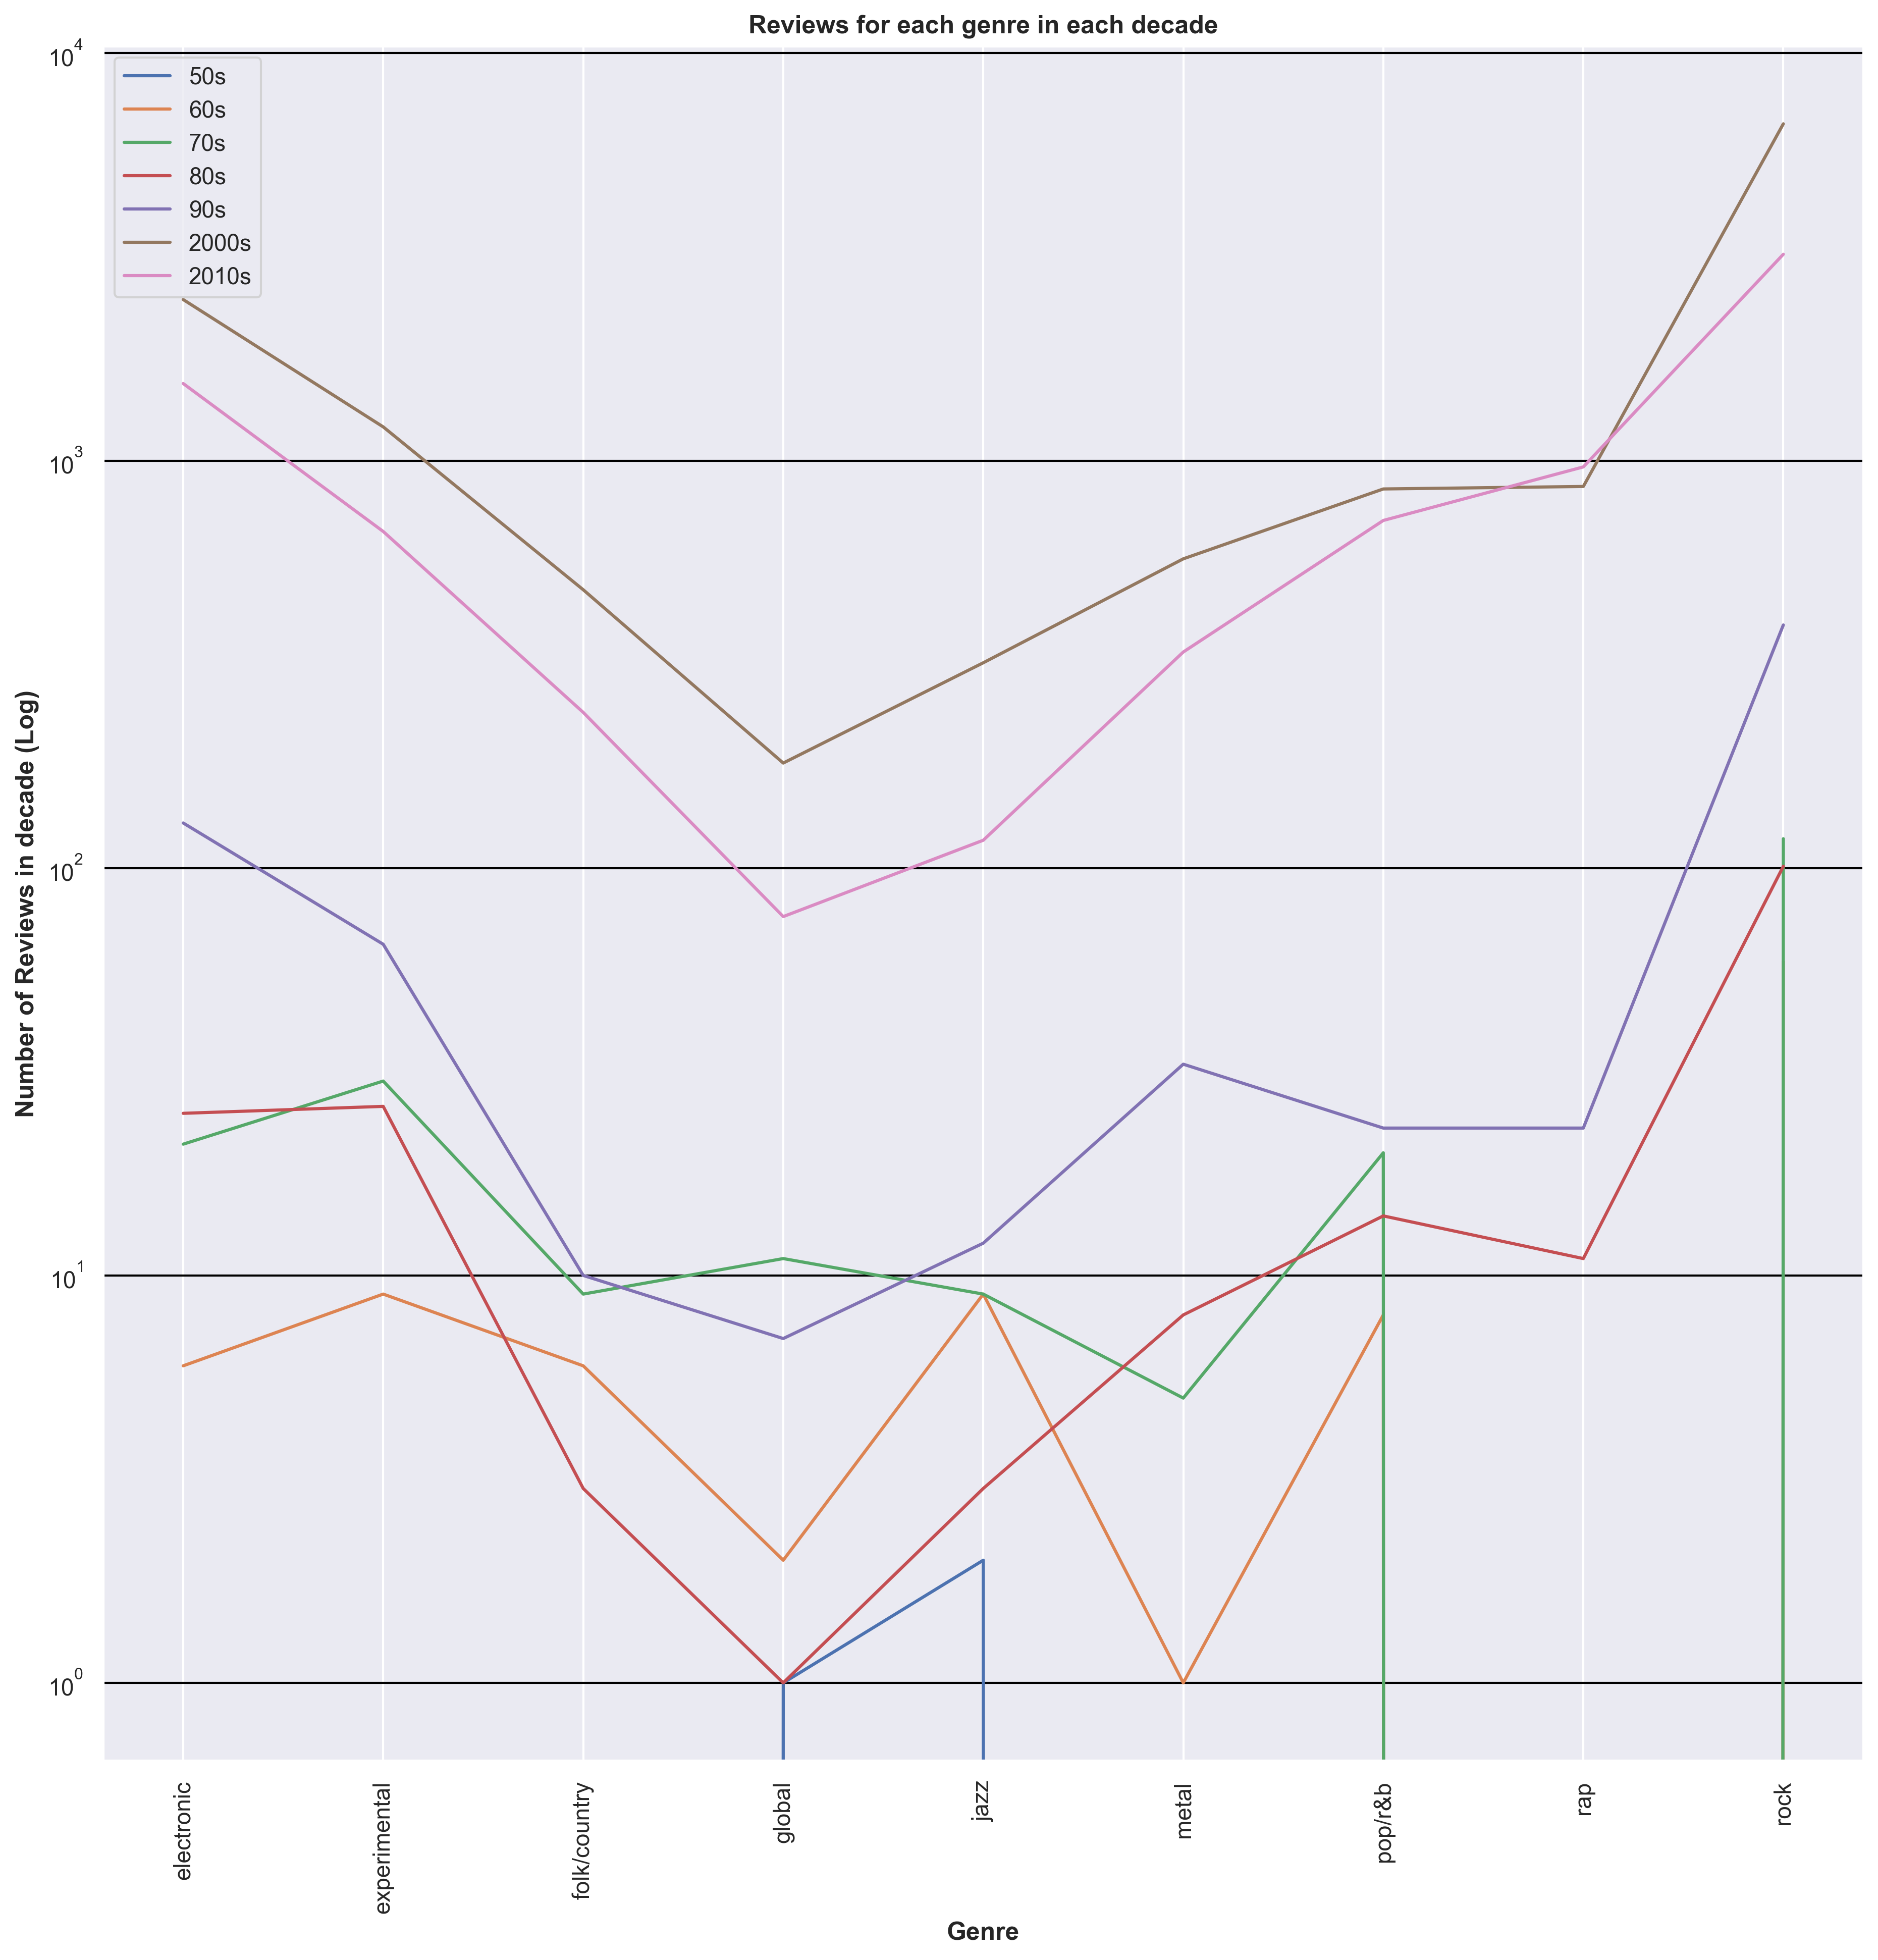

In [36]:
fig, axs = plt.subplots(nrows=1,ncols=1)

for yr in decade_df.columns[1:]:
    axs = sns.lineplot(data=decade_df, x='genre', y=yr)

axs.legend(handles=axs.lines[:], labels=['50s','60s', '70s', '80s', '90s', '2000s', '2010s'])

axs.set_title('Reviews for each genre in each decade', weight='bold')
plt.yscale('log')
plt.xlabel('Genre')
plt.ylabel(r'Number of Reviews in decade (Log)')
plt.xticks(rotation=90)
plt.grid(b=True, axis='y', color='black')
plt.grid(b=True, axis='x', color='white')

plt.show()

As we saw in the previous visualization, there was a huge increase in the number of reviews after 2000. Hence, decade of 2000s and 2010s had max reviews where **rock and electronic** being the most popular genres genres. **Jazz** being the most reviewed genre during the 60s and **metal** had a jump in popularity during and after 80s.